In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
props = pd.read_csv("http://www.firstpythonnotebook.org/_static/committees.csv")

In [5]:
contribs = pd.read_csv("http://www.firstpythonnotebook.org/_static/contributions.csv")

In [6]:
prop = props[props.prop_name == 'PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE.']


In [8]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 74 to 84
Data columns (total 8 columns):
ocd_prop_id               11 non-null object
calaccess_prop_id         11 non-null int64
ccdc_prop_id              11 non-null int64
prop_name                 11 non-null object
ccdc_committee_id         11 non-null int64
calaccess_committee_id    11 non-null int64
committee_name            11 non-null object
committee_position        11 non-null object
dtypes: int64(4), object(4)
memory usage: 792.0+ bytes


In [10]:
merged = pd.merge(prop, contribs, on="calaccess_committee_id")

In [11]:
support = merged[merged.committee_position == "SUPPORT"]

In [12]:
oppose = merged[merged.committee_position == "OPPOSE"]

In [13]:
top_supporters = support.groupby(
    ["contributor_firstname", "contributor_lastname"]
).amount.sum().reset_index().sort_values("amount", ascending=False).head(10)


In [14]:
top_supporters.head(10)

,contributor_firstname,contributor_lastname,amount
444,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0
443,SEAN,PARKER,1500000.0
102,DANIEL,LEWIS,1250000.0
180,HENRY,VAN AMERINGEN,1000000.0
374,NICHOLAS,PRITZKER,900000.0
390,PETER,THIEL,300000.0
421,ROGER,JENKINS,75000.0
22,ANGELA,HOWARD,65000.0
297,LAWRENCE,HESS,30000.0
425,ROGER B.,MCNAMEE,10000.0


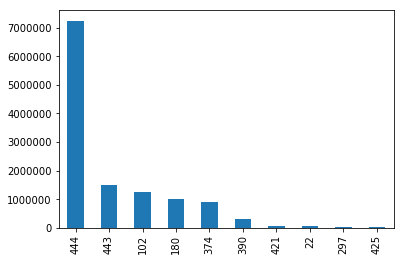

In [15]:
top_supporters.amount.plot.bar()

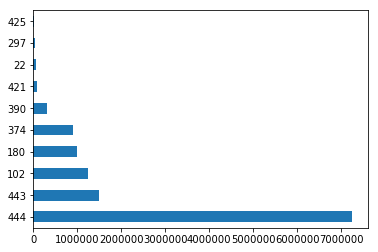

In [16]:
top_supporters.amount.plot.barh()

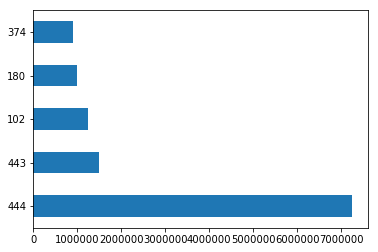

In [17]:
top_supporters.head(5).amount.plot.barh()

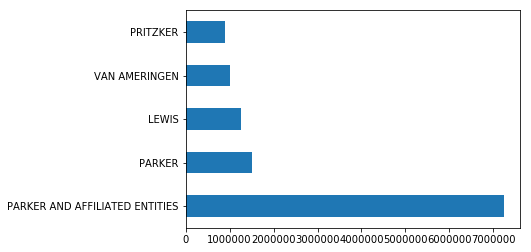

In [18]:
chart = top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_lastname)

In [19]:
top_supporters['contributor_fullname'] = top_supporters.contributor_firstname + " " + top_supporters.contributor_lastname

In [20]:
top_supporters.head()


,contributor_firstname,contributor_lastname,amount,contributor_fullname
444,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0,SEAN PARKER AND AFFILIATED ENTITIES
443,SEAN,PARKER,1500000.0,SEAN PARKER
102,DANIEL,LEWIS,1250000.0,DANIEL LEWIS
180,HENRY,VAN AMERINGEN,1000000.0,HENRY VAN AMERINGEN
374,NICHOLAS,PRITZKER,900000.0,NICHOLAS PRITZKER


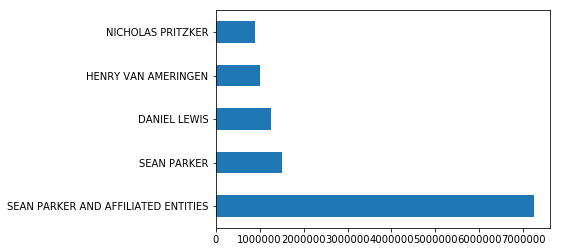

In [21]:
chart = top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_fullname)

In [22]:
top_supporters.head(5).to_csv("top_supporters.csv")